### Import Libraries
 

In [3]:
from scipy.io import loadmat #Scipy is a python library used for scientific computing and quite naturally, 
                             #they have a method which lets you read in .mat files.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load mill mat file
mat_data=loadmat("mill.mat")

### Data Profiling

In [6]:
print("Data is in form of",type(mat_data)) # so the mill_data into which contents of the mat file are loaded is of dictionary type.
print("Keys of dictionary",mat_data.keys()) # the data is inside the mill key

Data is in form of <class 'dict'>
Keys of dictionary dict_keys(['__header__', '__version__', '__globals__', 'mill'])


In [7]:
print("Mill data is in form of",type(mat_data['mill']))
mat_data['mill'].shape #so there are total 167 experimental runs 

Mill data is in form of <class 'numpy.ndarray'>


(1, 167)

In [8]:
mill_data=mat_data['mill']
mill_data.dtype # a structured datatype

dtype([('case', 'O'), ('run', 'O'), ('VB', 'O'), ('time', 'O'), ('DOC', 'O'), ('feed', 'O'), ('material', 'O'), ('smcAC', 'O'), ('smcDC', 'O'), ('vib_table', 'O'), ('vib_spindle', 'O'), ('AE_table', 'O'), ('AE_spindle', 'O')])

In [8]:
mill_data.dtype.names #to access the field names of a structured datatype use the names attribute of the dtype object

('case',
 'run',
 'VB',
 'time',
 'DOC',
 'feed',
 'material',
 'smcAC',
 'smcDC',
 'vib_table',
 'vib_spindle',
 'AE_table',
 'AE_spindle')

### Exploring for first experimental run 

In [34]:
mill_data.shape #a 2D array

(1, 167)

In [37]:
mill_data[0].shape #a 1D array

(167,)

In [30]:
mill_data[0,0]#this gives you the values for only the fields for first row out of total 167 rows.

(array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[2]], dtype=uint8), array([[1.5]]), array([[0.5]]), array([[1]], dtype=uint8), array([[-0.01708984],
       [ 0.26367188],
       [ 0.20751953],
       ...,
       [-0.80810547],
       [-0.73242188],
       [-0.57617188]]), array([[0.625     ],
       [0.81054688],
       [0.78125   ],
       ...,
       [1.38183594],
       [1.30371094],
       [1.52832031]]), array([[0.078125  ],
       [0.08544922],
       [0.078125  ],
       ...,
       [0.27587891],
       [0.52246094],
       [0.37841797]]), array([[0.31494141],
       [0.30151367],
       [0.30395508],
       ...,
       [0.3125    ],
       [0.31738281],
       [0.3112793 ]]), array([[0.08728027],
       [0.0982666 ],
       [0.09216309],
       ...,
       [0.10131836],
       [0.12756348],
       [0.12329102]]), array([[0.10375977],
       [0.12329102],
       [0.10498047],
       ...,
       [0.10681152],
       [0.11230469],
       [0

In [38]:
mill_data[0,0]['case'][0][0] #to access the values within the field

1

In [39]:
# Lets print what is what are the values of the fields for the first row
# First lets see the operating conditions
fields= mill_data.dtype.names
for field in fields[0:7]:
    print(f"Value of {field} is {mill_data[0,0][field][0][0]}")

#Lets see the shape of 6 sensors data:
for field in fields[8:]:
     print(f"Shape of {field} is {mill_data[0,0][field].shape}")

Value of case is 1
Value of run is 1
Value of VB is 0
Value of time is 2
Value of DOC is 1.5
Value of feed is 0.5
Value of material is 1
Shape of smcDC is (9000, 1)
Shape of vib_table is (9000, 1)
Shape of vib_spindle is (9000, 1)
Shape of AE_table is (9000, 1)
Shape of AE_spindle is (9000, 1)


### Seeing the trend of sensors for first experimental run

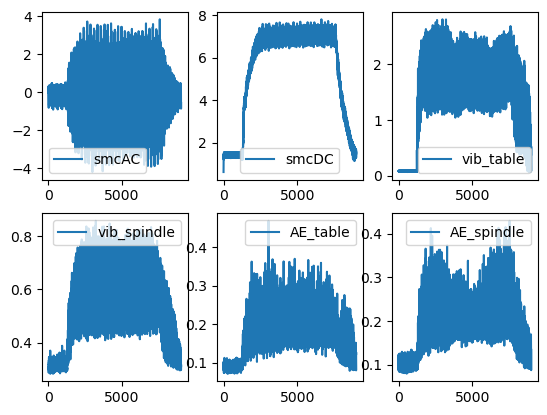

In [10]:
plt.subplot(2,3,1)
plt.plot(mill_data[0,0]["smcAC"],label="smcAC")
plt.legend()

plt.subplot(2,3,2)
plt.plot(mill_data[0,0]["smcDC"],label="smcDC")
plt.legend()

plt.subplot(2,3,3)
plt.plot(mill_data[0,0]["vib_table"],label="vib_table")
plt.legend()

plt.subplot(2,3,4)
plt.plot(mill_data[0,0]["vib_spindle"],label="vib_spindle")
plt.legend()

plt.subplot(2,3,5)
plt.plot(mill_data[0,0]["AE_table"],label="AE_table")
plt.legend()

plt.subplot(2,3,6)
plt.plot(mill_data[0,0]["AE_spindle"],label="AE_spindle")
plt.legend()


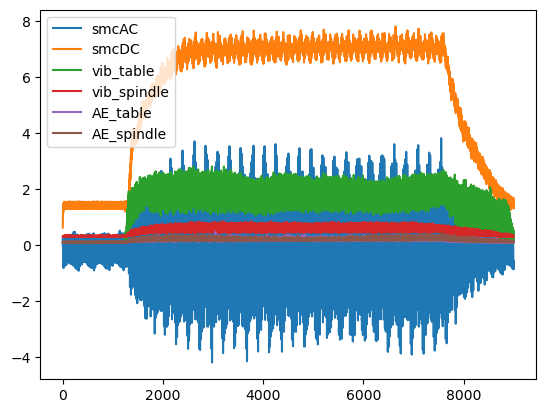

In [15]:

fig, ax = plt.subplots()

ax.plot(mill_data[0,0]['smcAC'], label='smcAC')
ax.plot(mill_data[0,0]['smcDC'], label='smcDC')
ax.plot(mill_data[0,0]['vib_table'], label='vib_table')
ax.plot(mill_data[0,0]['vib_spindle'], label='vib_spindle')
ax.plot(mill_data[0,0]['AE_table'], label='AE_table')
ax.plot(mill_data[0,0]['AE_spindle'], label='AE_spindle')

plt.legend()

### Plot for first five experimental runs

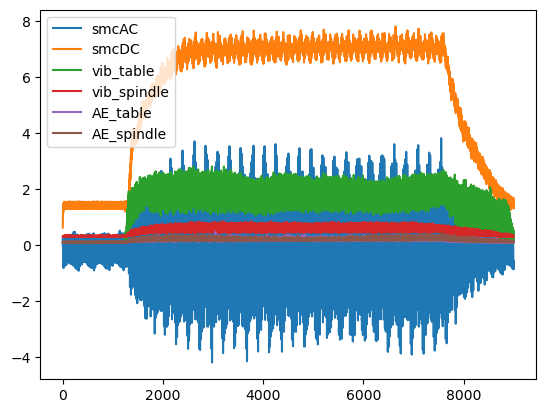

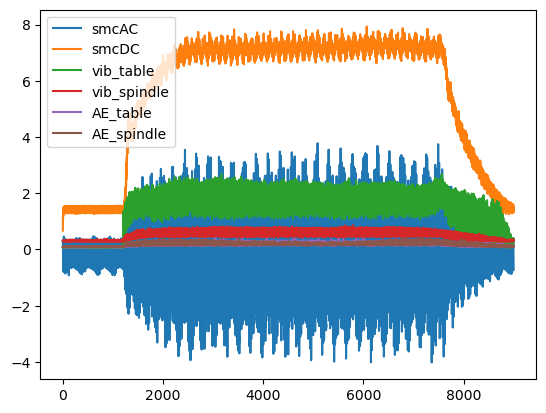

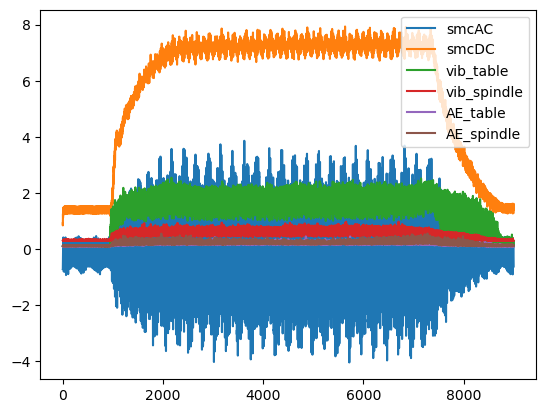

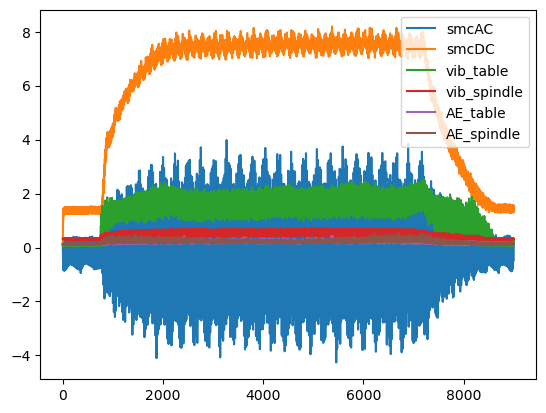

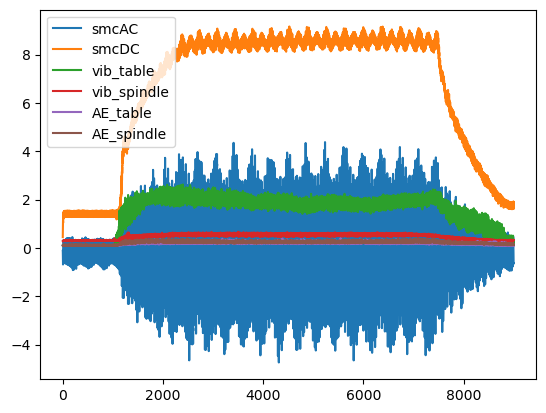

In [42]:
for iteration in range(5):
    fig, ax = plt.subplots()

    ax.plot(mill_data[0,iteration]['smcAC'], label='smcAC')
    ax.plot(mill_data[0,iteration]['smcDC'], label='smcDC')
    ax.plot(mill_data[0,iteration]['vib_table'], label='vib_table')
    ax.plot(mill_data[0,iteration]['vib_spindle'], label='vib_spindle')
    ax.plot(mill_data[0,iteration]['AE_table'], label='AE_table')
    ax.plot(mill_data[0,iteration]['AE_spindle'], label='AE_spindle')

    plt.legend()
    plt.savefig(f"plot_{iteration}.png")
    plt.close()

### Plot for all experimental runs

In [44]:
for iteration in range(167):
    fig, ax = plt.subplots()

    ax.plot(mill_data[0,iteration]['smcAC'], label='smcAC')
    ax.plot(mill_data[0,iteration]['smcDC'], label='smcDC')
    ax.plot(mill_data[0,iteration]['vib_table'], label='vib_table')
    ax.plot(mill_data[0,iteration]['vib_spindle'], label='vib_spindle')
    ax.plot(mill_data[0,iteration]['AE_table'], label='AE_table')
    ax.plot(mill_data[0,iteration]['AE_spindle'], label='AE_spindle')

    plt.legend()
    plt.close()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>